In [7]:
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df=df.explode('job_skills')

In [22]:
df=df.dropna(subset='salary_year_avg')

In [23]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_location']=='United States')].copy()

Text(9.444444444444445, 0.5, 'Number of Jobs in US')

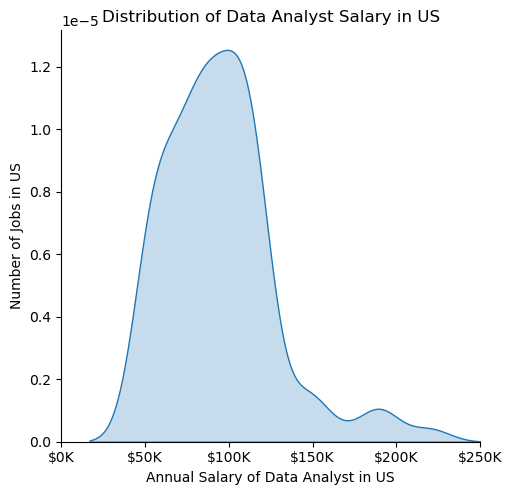

In [26]:
##df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill='true')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Distribution of Data Analyst Salary in US')
plt.xlabel('Annual Salary of Data Analyst in US')
plt.ylabel('Number of Jobs in US')